In [1]:
%run init.ipynb
%run init-quantum_gates.ipynb

# Qudits

In this material, we will present some generalizations for systems of $d$ levels of gates commonly used in qubits.

The production of this content was through the reference of the following link: [https://github.com/jonasmaziero/qiskit2/blob/main/10_qudits.ipynb](https://github.com/jonasmaziero/qiskit2/blob/main /10_qudits.ipynb)

# Fourier operator

The Fourier operator generalizes the Hadamard gate to a system of $d$ levels. The Fourier gate, or Fourier operator, is defined as

\begin{equation}
F = \frac{1}{\sqrt{d}}\sum_{j,k=0}^{d-1}e^{2\pi ijk/d}|j\rangle\langle k|.
\end{equation}

Let's look at some particular cases.

## `op_Fourier(d)`
With this function it is possible to build the Fourier operator for any dimension $d$.

In [2]:
def op_Fourier(d):
    F = zeros(d,d)
    for j in range(0,d):
        for k in range(0,d):
            F[j,k] = (1/sqrt(d))*exp(simplify(1j*2*sympy.pi*j*k/d, rational=True))
    return F

In [2]:
def op_Fourier(d):
    F = zeros(d,d)
    for j in range(0,d):
        for k in range(0,d):
            F[j,k] = (1/sqrt(d))*exp(simplify(1j*2*sympy.pi*j*k/d, rational=True))
    return F

### Qubits - $d=2$

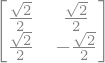

In [3]:
F2 = op_Fourier(2)
F2

For this particular case, we have the Hadamard gate already presented in the other files. Just to recap, when we actuate the H gate on the computational basis ($|0\rangle,|1\rangle$) for qubits we have respectively ($|+\rangle,|-\rangle$), or with our code, we have

In [4]:
ψ2_0 = pbk('0')
ψ2_1 = pbk('1')
mbk(ψ2_0), mbk(ψ2_1)

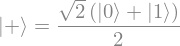

In [7]:
xp = gatep(F2, ψ2_0, 0)
Eq(mysim(mbk_xyBB(xp, ('x',0))), mysim(mbk(xp)))

and

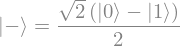

In [8]:
xm = gatep(F2, ψ2_1, 0)
Eq(mysim(mbk_xyBB(xm, ('x',0))), mysim(mbk(xm)))

As we know, $|+\rangle,|-\rangle$ are ortogonal, the inner product between them result zero, so

In [89]:
inner_product(xp,xp)

In [88]:
inner_product(xp,xm)

In [9]:
inner_product(xm,xp)

In [90]:
inner_product(xm,xm)

### Qutrits - $d=3$

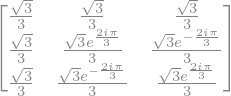

In [72]:
F3 = op_Fourier(3)
F3

Consider

In [12]:
ψ3_0 = pbk('0', dim=3)
ψ3_1 = pbk('1', dim=3)
ψ3_2 = pbk('2', dim=3)
mbk(ψ3_0, dim=3), mbk(ψ3_1, dim=3), mbk(ψ3_2, dim=3)

In [13]:
# python vector to save the vectors we will get
x3 = np.zeros(3, dtype=object)
print(x3)

[0 0 0]


So, acting $F3$ on the computacional basis to qutrit, we have

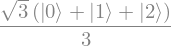

In [14]:
x3[0] = gatep(F3, ψ3_0, 0, dim=3)
mysim(mbk(x3[0], dim=3))

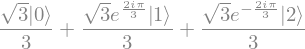

In [15]:
x3[1] = gatep(F3, ψ3_1, 0, dim=3)
mbk(x3[1], dim=3)

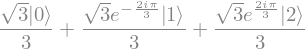

In [20]:
x3[2] = gatep(F3, ψ3_2, 0, dim=3)
mbk(x3[2], dim=3)

As we saw for qubit, the inner product between each of these distinct resultant vectors produced by the operation of the Fourier operator on the computational base of qutrits must be zero, thus

In [17]:
#< x3[j] | x3[k] > = δ_{jk}
for i in range(3):
    for j in range(3):
        x = nsimplify(inner_product(x3[i],x3[j]))
        print('< x3[{}] | x3[{}] > = {}'.format(i,j, x))

< x3[0] | x3[0] > = 1
< x3[0] | x3[1] > = 0
< x3[0] | x3[2] > = 0
< x3[1] | x3[0] > = 0
< x3[1] | x3[1] > = 1
< x3[1] | x3[2] > = 0
< x3[2] | x3[0] > = 0
< x3[2] | x3[1] > = 0
< x3[2] | x3[2] > = 1


As we would like to obtain, the inner product on equal vectors results in 1 and on different vectors results in 0.

### Ququad - $d=4$

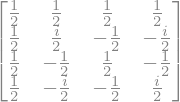

In [41]:
F4 = op_Fourier(4)
F4

Consider

In [42]:
ψ4_0 = pbk('0', dim=4)
ψ4_1 = pbk('1', dim=4)
ψ4_2 = pbk('2', dim=4)
ψ4_3 = pbk('3', dim=4)
mbk(ψ4_0, dim=4), mbk(ψ4_1, dim=4), mbk(ψ4_2, dim=4), mbk(ψ4_3, dim=4)

In [43]:
# python vector to save the vectors we will get
x4 = np.zeros(4, dtype=object)
print(x4)

[0 0 0 0]


Acting on the computacional basis to ququad, we have

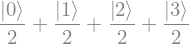

In [44]:
x4[0] = gatep(F4, ψ4_0, 0, 4)
mbk(x4[0], dim=4)

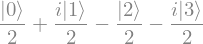

In [45]:
x4[1] = gatep(F4, ψ4_1, 0, 4)
mbk(x4[1], dim=4)

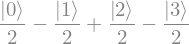

In [46]:
x4[2] = gatep(F4, ψ4_2, 0, 4)
mbk(x4[2], dim=4)

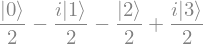

In [47]:
x4[3] = gatep(F4, ψ4_3, 0, 4)
mbk(x4[3], dim=4)

Checking the inner product between each of the vectors obtained

In [64]:
#< x4[j] | x4[k] > = δ_{jk}
for i in range(4):
    for j in range(4):
        x = nsimplify(inner_product(x4[i],x4[j]))
        print('< x4[{}] | x4[{}] > = {}'.format(i,j, x))

< x4[0] | x4[0] > = 1
< x4[0] | x4[1] > = 0
< x4[0] | x4[2] > = 0
< x4[0] | x4[3] > = 0
< x4[1] | x4[0] > = 0
< x4[1] | x4[1] > = 1
< x4[1] | x4[2] > = 0
< x4[1] | x4[3] > = 0
< x4[2] | x4[0] > = 0
< x4[2] | x4[1] > = 0
< x4[2] | x4[2] > = 1
< x4[2] | x4[3] > = 0
< x4[3] | x4[0] > = 0
< x4[3] | x4[1] > = 0
< x4[3] | x4[2] > = 0
< x4[3] | x4[3] > = 1
